# Perceptron



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
from MultiLayerPerceptron import MultiLayerPerceptron

# Important Functions

In [3]:
def plot_loss(epoch_his, train_loss_his, test_loss_his):
    train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

In [4]:
def plot_accuracy(epoch_his, train_acc_his, test_acc_his):
    train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

# Perceptron Network

In [5]:
# Testing the Neural Network for predicting XOR function

In [6]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])

In [7]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])

(2, 1) (1,)
<function sigmoid at 0x7f84d949c268>


In [8]:
# testing the model outputs
pred , _ = model.forward(X_train)
# print(np.sum((pred > 0.5)== Y_train) / Y_train.shape[0])
# accuracy(model , X_train,Y_train)
# X_train[0]

In [9]:
# Checking for testing purposes(BCE should be used here ideally)
from Loss import mean_abs_error,mean_square_error
loss,d_back = mean_square_error(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.19074741]
And the error to be back propogated is:
 [[-0.125     ]
 [ 0.14438052]
 [ 0.16301045]
 [ 0.17980702]]


In [10]:
from Loss import binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.97016268]
And the error to be back propogated is:
 [[-0.5       ]
 [ 0.59174688]
 [ 0.71847712]
 [ 0.89040237]]


In [11]:
# Now we can train the model by iteratively on each datapoint.

layer_list = [2,3,1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)


_=model.train(X_train,
            Y_train,
            X_train,
            Y_train,
            metric ='accuracy_binary',
            loss_function_string='binary_cross_entropy',
            epochs=1000,
            record_at=10)

(2, 3) (3,)
<function sigmoid at 0x7f84d949c268>
(3, 1) (1,)
<function sigmoid at 0x7f84d949c268>
0th EPOCH:
Training Loss:[0.81572632]|Training Accuracy:0.25|Test Loss:[0.77967229]|Test Accuracy:0.25
10th EPOCH:
Training Loss:[0.59801544]|Training Accuracy:0.75|Test Loss:[0.58784976]|Test Accuracy:0.75
20th EPOCH:
Training Loss:[0.53582562]|Training Accuracy:0.75|Test Loss:[0.53280076]|Test Accuracy:0.75
30th EPOCH:
Training Loss:[0.51676465]|Training Accuracy:0.75|Test Loss:[0.51577579]|Test Accuracy:0.75
40th EPOCH:
Training Loss:[0.51005707]|Training Accuracy:0.75|Test Loss:[0.50963615]|Test Accuracy:0.75
50th EPOCH:
Training Loss:[0.50650943]|Training Accuracy:0.75|Test Loss:[0.50618949]|Test Accuracy:0.75
60th EPOCH:
Training Loss:[0.50313451]|Training Accuracy:0.75|Test Loss:[0.50276045]|Test Accuracy:0.75
70th EPOCH:
Training Loss:[0.49895053]|Training Accuracy:0.75|Test Loss:[0.49847376]|Test Accuracy:0.75
80th EPOCH:
Training Loss:[0.4936739]|Training Accuracy:0.75|Test Loss:

840th EPOCH:
Training Loss:[0.03258201]|Training Accuracy:1.0|Test Loss:[0.03251153]|Test Accuracy:1.0
850th EPOCH:
Training Loss:[0.03188885]|Training Accuracy:1.0|Test Loss:[0.03182094]|Test Accuracy:1.0
860th EPOCH:
Training Loss:[0.03122083]|Training Accuracy:1.0|Test Loss:[0.03115537]|Test Accuracy:1.0
870th EPOCH:
Training Loss:[0.03057673]|Training Accuracy:1.0|Test Loss:[0.03051359]|Test Accuracy:1.0
880th EPOCH:
Training Loss:[0.02995538]|Training Accuracy:1.0|Test Loss:[0.02989445]|Test Accuracy:1.0
890th EPOCH:
Training Loss:[0.0293557]|Training Accuracy:1.0|Test Loss:[0.02929688]|Test Accuracy:1.0
900th EPOCH:
Training Loss:[0.02877666]|Training Accuracy:1.0|Test Loss:[0.02871986]|Test Accuracy:1.0
910th EPOCH:
Training Loss:[0.02821731]|Training Accuracy:1.0|Test Loss:[0.02816242]|Test Accuracy:1.0
920th EPOCH:
Training Loss:[0.02767673]|Training Accuracy:1.0|Test Loss:[0.02762367]|Test Accuracy:1.0
930th EPOCH:
Training Loss:[0.02715406]|Training Accuracy:1.0|Test Loss:[0

In [12]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
model.metric_function(X_train,Y_train,metric='accuracy_binary')

1.0

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.But we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [14]:
n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp

In [15]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [16]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]

X_test = X[train_n:]
Y_test = Y[train_n:]
Y_test.shape

(103, 1)

In [17]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','sigmoid','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7f84b07d9a60>
(20, 20) (20,)
<function sigmoid at 0x7f84d949c268>
(20, 15) (15,)
<function sigmoid at 0x7f84d949c268>
(15, 8) (8,)
<function sigmoid at 0x7f84d949c268>
(8, 4) (4,)
<function sigmoid at 0x7f84d949c268>
(4, 1) (1,)
<function sigmoid at 0x7f84d949c268>


In [18]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_binary',
                                                                                loss_function_string='binary_cross_entropy',
                                                                                epochs = 200,
                                                                                record_at = 10,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:[1.23714499]|Training Accuracy:0.500542888165038|Test Loss:[0.96836456]|Test Accuracy:0.49514563106796117
10th EPOCH:
Training Loss:[0.69315411]|Training Accuracy:0.500542888165038|Test Loss:[0.69318331]|Test Accuracy:0.49514563106796117
20th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315836]|Test Accuracy:0.49514563106796117
30th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
40th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
50th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
60th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Test Loss:[0.69315831]|Test Accuracy:0.49514563106796117
70th EPOCH:
Training Loss:[0.69314659]|Training Accuracy:0.500542888165038|Te

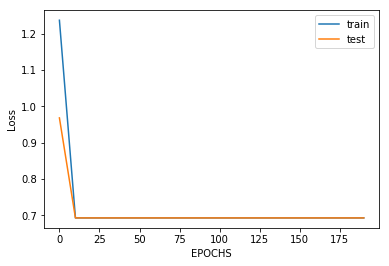

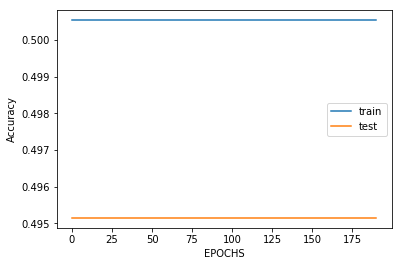

In [19]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# Simple Multiclass classification dataset

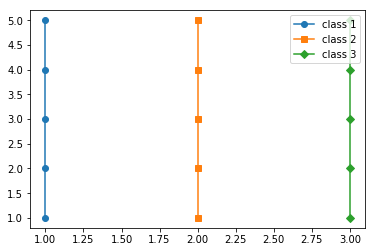

In [20]:
xcoords1 = [1,1,1,1,1]
xcoords2 = [2,2,2,2,2]
xcoords3 = [3,3,3,3,3]
ycoords = [1,2,3,4,5]
plt.plot(xcoords1, ycoords, label='class 1',marker='o')
plt.plot(xcoords2, ycoords, label='class 2',marker='s')
plt.plot(xcoords3, ycoords, label='class 3',marker='D')
plt.legend(loc='best')
plt.show()

In [21]:
#Making the dataset
dataset = [[i,j] for i in range(1,6) for j in range(1,4)]
labels = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]

In [22]:
div = 0.8
N = len(dataset)
X_train = np.array(dataset[:int(div*N)])
Y_train = np.array(labels[:int(div*N)])
X_test = np.array(dataset[int(div*N):])
Y_test = np.array(labels[int(div*N):])

In [23]:
layer_list = [2,6,3]#,8,8,8,6,3]
activation_list = ['sigmoid','linear']#,'relu','relu','relu','relu']
model = MultiLayerPerceptron(layer_list,activation_list)

(2, 6) (6,)
<function sigmoid at 0x7f84d949c268>
(6, 3) (3,)
<function linear at 0x7f84b07d9c80>


In [24]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 80,
                                                                                record_at = 10,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:1.000000082745371e-11|Training Accuracy:0.3333333333333333|Test Loss:25.3284360229345|Test Accuracy:0.3333333333333333
10th EPOCH:
Training Loss:0.8505599245477117|Training Accuracy:0.5|Test Loss:1.0009034538751573|Test Accuracy:0.3333333333333333
20th EPOCH:
Training Loss:0.5481239944839403|Training Accuracy:0.6666666666666666|Test Loss:0.6590635103734606|Test Accuracy:0.6666666666666666
30th EPOCH:
Training Loss:0.5123832749885671|Training Accuracy:0.8333333333333334|Test Loss:0.4923628983056804|Test Accuracy:0.6666666666666666
40th EPOCH:
Training Loss:0.5116765475517989|Training Accuracy:0.9166666666666666|Test Loss:0.48561313022116864|Test Accuracy:0.6666666666666666
50th EPOCH:
Training Loss:2.8274247522569524|Training Accuracy:0.5833333333333334|Test Loss:0.5542726251731007|Test Accuracy:1.0
60th EPOCH:
Training Loss:0.4310913043939569|Training Accuracy:1.0|Test Loss:0.4039148659417468|Test Accuracy:1.0
70th EPOCH:
Training Loss:0.44045264061090966|Train

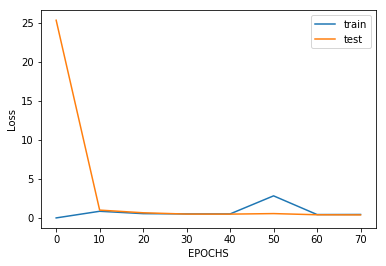

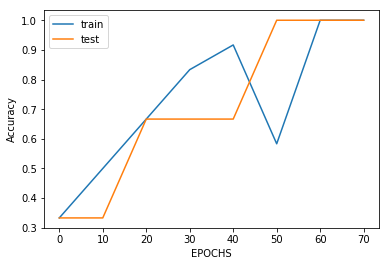

In [25]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# gene expression cancer RNA-Seq Data Set
From UCI Machine Learning Dataset Repository  
By Samuele Fiorini, University of Genoa  
Link : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

In [45]:
dataset = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv')
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [46]:
dataset.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [47]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [48]:
# Deleting label and dataset indexes
dataset = dataset.drop(columns=['Unnamed: 0'],axis=1)
labels = labels.drop(columns=['Unnamed: 0'],axis=1)

In [49]:
# Converting labels to one hot encoding
labels = pd.get_dummies(labels)

In [51]:
# Converting dataset and labels to numpy array
dataset = dataset.values
labels = labels.values

In [59]:
div = 0.8
N = len(dataset)
X_train = dataset[:int(div*N)]
Y_train = labels[:int(div*N)]
X_test = dataset[int(div*N):]
Y_test = labels[int(div*N):]

In [95]:
layer_list = [20531,45,45,45,45,5]
activation_list = ['relu','relu','relu','relu','linear']
model = MultiLayerPerceptron(layer_list,activation_list)

(20531, 45) (45,)
<function relu at 0x7f84b07d9a60>
(45, 45) (45,)
<function relu at 0x7f84b07d9a60>
(45, 45) (45,)
<function relu at 0x7f84b07d9a60>
(45, 45) (45,)
<function relu at 0x7f84b07d9a60>
(45, 5) (5,)
<function linear at 0x7f84b07d9c80>


In [96]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 500,
                                                                                record_at = 20,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:1.0000000827453712e-11|Training Accuracy:0.1|Test Loss:25.328436022934504|Test Accuracy:0.37267080745341613
20th EPOCH:
Training Loss:9.49816350860669|Training Accuracy:0.1796875|Test Loss:15.88926731873904|Test Accuracy:0.37267080745341613
40th EPOCH:
Training Loss:9.49816350860669|Training Accuracy:0.1796875|Test Loss:15.88926731873904|Test Accuracy:0.37267080745341613
60th EPOCH:
Training Loss:9.49816350860669|Training Accuracy:0.1796875|Test Loss:15.88926731873904|Test Accuracy:0.37267080745341613
80th EPOCH:
Training Loss:9.49816350860669|Training Accuracy:0.1796875|Test Loss:15.88926731873904|Test Accuracy:0.37267080745341613


KeyboardInterrupt: 

In [ ]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)